# PDF Analysen

In [55]:
import os
from pathlib import Path
import pandas as pd
import numpy as np
import pickle

### Lade die Daten vom Pickle (DataFrame)
- comp_pdf.pickle von compare_pdf_all.py erstellt
- vergleich von der .json mit dem auslesbaren Teil aus der PDF
- PDF_compare ist eine List mit True oder dem abweichenden Text -> abweichender Text == False

In [56]:
pickle_path = "./data/pickle_jar/"

with open(pickle_path + "comp_pdf.pickle","rb") as file:
    df = pickle.load(file)

DataFrame anpassen

In [57]:
df.set_index('file_url',inplace=True)

df.head(5)

,id,PDF_compare
file_url,,
gmbl-ausgabe-1956-5.pdf,240723,"[True, True, True, True, True, True, True, Tru..."
gmbl-ausgabe-1968-31.pdf,240724,[]
gmbl-ausgabe-2019-59.pdf,240725,"[True, True, True, True, True, True, True, Tru..."
gmbl-ausgabe-1997-12.pdf,240726,"[True, True, True, True, True, True, True, Tru..."
gmbl-ausgabe-2018-31.pdf,240727,"[True, True, True, True, True, True, True, Tru..."


PDF_compare2 im Format True or False umwandeln, Summe und ratio = Richtig / Gesammt bilden.

In [58]:
df["PDF_compare2"] = df["PDF_compare"].apply(lambda x: [y == True for y in x])
df["sum"] = df["PDF_compare2"].apply(np.sum)
df["len"] = df["PDF_compare2"].apply(len)
df["ratio"] = df["sum"] / df["len"]

df.head(5)

,id,PDF_compare,PDF_compare2,sum,len,ratio
file_url,,,,,,
gmbl-ausgabe-1956-5.pdf,240723,"[True, True, True, True, True, True, True, Tru...","[True, True, True, True, True, True, True, Tru...",928.0,932,0.995708
gmbl-ausgabe-1968-31.pdf,240724,[],[],0.0,0,NaN
gmbl-ausgabe-2019-59.pdf,240725,"[True, True, True, True, True, True, True, Tru...","[True, True, True, True, True, True, True, Tru...",2281.0,2365,0.964482
gmbl-ausgabe-1997-12.pdf,240726,"[True, True, True, True, True, True, True, Tru...","[True, True, True, True, True, True, True, Tru...",1429.0,1432,0.997905
gmbl-ausgabe-2018-31.pdf,240727,"[True, True, True, True, True, True, True, Tru...","[True, True, True, True, True, True, True, Tru...",884.0,888,0.995495


Die Ratio (z.B. 0.9957), sagt aus, dass 99,57% der getesteten Text-Blöcke übereinstimmen. Umgekehrt heißt dies lediglich, dass in den restlichen Text-Blöcken mindestens ein Buchstabe anders ist.

Anzahl der Ausgaben, bei denen compare_pdf_all.py nicht funktioniert hat. Fehler in den PDFs, die ein Auslesen allgemein, oder mit dem verwendeten Tool verhindert haben.

In [59]:
print(df.shape)

print(df["ratio"].isna().sum())
print("Anzahl NA in ratio Spalte")

(2713, 6)
1054
Anzahl NA in ratio Spalte


In [60]:
show_na_ratio = df["ratio"]

Stichprobe zur Kontrolle

In [61]:
df.loc["gmbl-ausgabe-1950-1.pdf"]

id                                                         242941
PDF_compare     [True, True, True, True, True, True, True, Tru...
PDF_compare2    [True, True, True, True, True, True, True, Tru...
sum                                                        6584.0
len                                                          6593
ratio                                                    0.998635
Name: gmbl-ausgabe-1950-1.pdf, dtype: object

Entfernen der Nan um den DataFrame klein zu halten.

In [62]:
df.dropna(axis=0, inplace=True)
df.shape

(1659, 6)

etwas mehr Daten Analyse, auch zur Vorbereitung für unten.

In [63]:
df["PDF_compare3"] = df["PDF_compare"] 
df["PDF_compare4"] = df["PDF_compare3"].apply(lambda x: [y == True for y in x])
df["PDF_compare5"] = df["PDF_compare3"].apply(lambda x: [y for y in x if y !=True]) # Liste von falscher Text ohne True
df["error_len"] = df["PDF_compare5"].apply(len) # Anzahl Error bzw. falscher Text
df["error_ele_len"] = df["PDF_compare5"].apply(lambda x: [len(y) for y in x if y])
df["error_ele_len_max"] = df["error_ele_len"][(df["error_len"] > 0)].apply(max)
df["error_ele_len_min"] = df["error_ele_len"][(df["error_len"] > 0)].apply(min)
df["error_ele_len_mean"] = df["error_ele_len"][(df["error_len"] > 0)].apply(np.mean)
df['Year'] = [int(i.split('-')[2]) for i in df.index]

df["sum2"] = df["PDF_compare4"].apply(np.sum)
df["len2"] = df["PDF_compare4"].apply(len)
df["ratio2"] = df["sum2"] / df["len2"]

df.shape

(1659, 18)

In [64]:
df.loc["gmbl-ausgabe-1950-1.pdf"]["PDF_compare5"]

['(1}DerBetroffenesollvorErlaßderVerfügungge-',
 'NachdieserUebersichtistderdurch5chniü;i}cheﬂAnie:a%',
 'diesemDurchschnittliegenbeidenBeamtendasBundes»«',
 'wesen,dasBundesministeriumfürAngelegenheitender',
 'Vertriebenen,dasBundesministeriumfürg:gesamte:ieu.i*s{_cha',
 'dasBundesministeriumderJustiz,',
 '—DirektionArbeit—',
 ';920241',
 'Wiesbaden,Beriramstr.3']

Beispiele der vorkommenden Fehlern, OCR und Kodierungsfehler.

In [65]:
show_error_text = df["PDF_compare5"]

Okay was ist das?

In [66]:
df.loc["gmbl-ausgabe-2005-63.pdf"]

id                                                               241255
PDF_compare           [True, True, True, True, desBeauftragtenderBun...
PDF_compare2          [True, True, True, True, False, False, False, ...
sum                                                              1424.0
len                                                                2576
ratio                                                          0.552795
PDF_compare3          [True, True, True, True, desBeauftragtenderBun...
PDF_compare4          [True, True, True, True, False, False, False, ...
PDF_compare5          [desBeauftragtenderBundesregierungf(cid:1)rKul...
error_len                                                          1152
error_ele_len         [57, 89, 115, 105, 118, 81, 73, 54, 58, 62, 67...
error_ele_len_max                                                 118.0
error_ele_len_min                                                  12.0
error_ele_len_mean                                            48

Etwas detailierter

In [67]:
df.loc["gmbl-ausgabe-2005-63.pdf"]["PDF_compare5"][:30]

['desBeauftragtenderBundesregierungf(cid:1)rKulturundMedien',
 'desAusw(cid:2)rtigenAmtes/desBundesministeriumsdesInnern/desBundesministeriumsderFinanzen',
 'desBundesministeriumsf(cid:1)rWirtschaftundTechnologie/desBundesministeriumsf(cid:1)rErn(cid:2)hrung,Landwirtschaft',
 'undVerbraucherschutz/desBundesministeriumsf(cid:1)rFamilie,Senioren,FrauenundJugend/desBundesministeriums',
 'f(cid:1)rGesundheit/desBundesministeriumsf(cid:1)rVerkehr,BauundStadtentwicklung/desBundesministeriumsf(cid:1)rUmwelt,',
 'NaturschutzundReaktorsicherheit/desBundesministeriumsf(cid:1)rBildungundForschung',
 'desBundesministeriumsf(cid:1)rwirtschaftlicheZusammenarbeitundEntwicklung',
 'Programmv.28.9.05desBMIzurF(cid:1)rderungdesLeistungs-',
 'Richtlinienv.10.10.05desBMI(cid:2)berdieGew(cid:3)hrungvon',
 'ZuwendungenzurF(cid:1)rderungvonBundessportfachverb(cid:3)nden',
 '(F(cid:1)rderrichtlinienVerb(cid:3)nde–FRV)....................1276',
 'Richtlinienv.10.10.05desBMI(cid:2)berdieGew(cid:3)hrungvon',
 'Z

gmbl-ausgabe-2005-63.pdf Diese Ausgabe, hat verschiedene Codierungen für Umlaute.

f(cid:1)r == für

F(cid:1)rderrichtlinien == Förderrichtlinien

Verschiedene PDF Viewer erkennen mehr oder weniger davon richtig.

### Mein kleiner Fix
Diese Codierung kann richtig angezeit werden, entsprechend wird dieser Fehler von False zu True geändert.

In [68]:
def fix_cid(list_pdf_com):
    a= []
    for i in list_pdf_com:
        if type(i) == str and "(cid:" in i:
            a.append(True)
        else:
            a.append(i)
    return a

In [69]:
df["PDF_compare3"] = df["PDF_compare"].map(fix_cid)
df["PDF_compare4"] = df["PDF_compare3"].apply(lambda x: [y == True for y in x])
df["PDF_compare5"] = df["PDF_compare3"].apply(lambda x: [y for y in x if y !=True])
df["error_len"] = df["PDF_compare5"].apply(len)
df["error_ele_len"] = df["PDF_compare5"].apply(lambda x: [len(y) for y in x if y])
df["error_ele_len_max"] = df["error_ele_len"][(df["error_len"] > 0)].apply(max)
df["error_ele_len_min"] = df["error_ele_len"][(df["error_len"] > 0)].apply(min)
df["error_ele_len_mean"] = df["error_ele_len"][(df["error_len"] > 0)].apply(np.mean)
df['Year'] = [int(i.split('-')[2]) for i in df.index]

df["sum2"] = df["PDF_compare4"].apply(np.sum)
df["len2"] = df["PDF_compare4"].apply(len)
df["ratio2"] = df["sum2"] / df["len2"]

df.shape

(1659, 18)

In [70]:
show_ratios = df[["ratio", "ratio2"]]

In [71]:
print("Summe 100% richtig, ratio")
print(df["ratio"][df["ratio"] == 1].sum())
print("Summe 100% richtig, ratio2")
print(df["ratio2"][df["ratio2"] == 1].sum())
df.shape

Summe 100% richtig, ratio
559.0
Summe 100% richtig, ratio2
673.0


(1659, 18)

Diese Korrektur hat Fehler korrigiert, die je nach PDF Viewer richtig angezeigt werden. z.B. Adobe, Chrome, Edge, Firefox

Suche nach PDFs mit Text der nicht markierbar ist, aber in der PDF hinterlegt sind.
Diese kann bei verschiedenen PDF Viewer unteschiedlich sein.

PDFs von 2003 bis 2023
- Reduktion auf die letzten 21 Jahre, da alles davor, mittels OCR gemacht wurde und die oben reduzierten compare_pdf_all.py fehler hauptsächlich von vor 2003 sind. Der Untersuchte Datensatz wird dadurch konsistenter. Außerdem ist Inhaltlich das meiste nicht mehr aktuell. 

In [72]:
print("fehlerfreie PDF")
print(((df["Year"] > 2002) & (df["ratio"] == 1)).sum())

print("fehlerfrei nach 'cid:'-Platzhalter Korrektur")
print(((df["Year"] > 2002) & (df["ratio2"] == 1)).sum())

print("von insgesammt:")
df["ratio"][df["Year"] > 2002].count()

fehlerfreie PDF
132
fehlerfrei nach 'cid:'-Platzhalter Korrektur
199
von insgesammt:


824

Suche nach PDFs die Textblöcke haben, die höchstwahrscheinlich von dem meisten PDF Viewern, nicht markiert werden können.

In [73]:
big_error = df[["error_len", "PDF_compare5"]][(df["error_len"] > 7) 
                                            & (df["error_ele_len_max"] > 40) 
                                            & (df["error_ele_len_mean"] > 19) 
                                            & (df["Year"] > 2002)]

<Axes: title={'center': 'Fehler und Anzahl pro Jahr'}, xlabel='Jahr', ylabel='Ausgaben'>

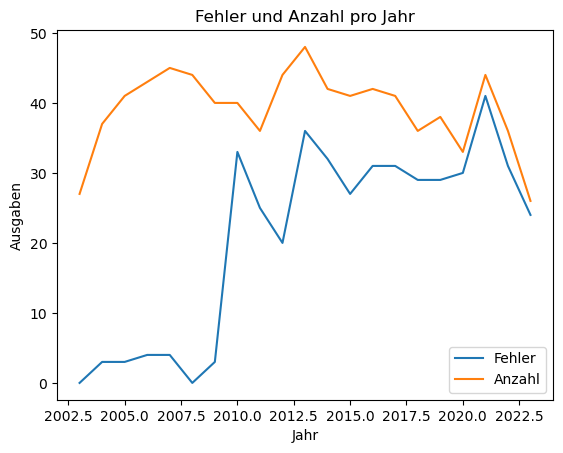

In [74]:
df["plotme"] = (df["error_len"] > 7) & (df["error_ele_len_max"] > 40) & (df["error_ele_len_mean"] > 19) & (df["Year"] > 2002)
df[df["Year"] > 2002].groupby("Year")["plotme"].sum().plot(ylabel= "Ausgaben", xlabel="Jahr", legend= "True", title= "Fehler und Anzahl pro Jahr", label="Fehler")
df[df["Year"] > 2002].groupby("Year")["plotme"].count().plot(label="Anzahl", xlabel="Jahr", legend= "True")

### Hat um 2010 das Innenministerium angefangen selbst PDFs zu erstellen?
Die Sichtung einzelner PDFs und die unregelmäßig vorhandenen Metadaten geben Hinweise darauf, wie die PDFs erstellt wurden. Die PDFs werden aus mehreren Quellen zusammengefügt. Faktoren sind verschiedene Ministerien, verschiedene Abteilungen, die auch wissenschaftliche und technische Abhandlungen einfügen, und verschiedene Programme zur PDF-Erstellung verwenden. So kommt es vor, dass in einer Ausgabe verschiedene cid-Kodierungen, verschiedenen UTF-8- bzw. ASCII-UTF-8-Kodierungen für den gleichen Umlaut vorkommen. Obwohl meist um die 10 verschiedene Schriftarten benutzt werden, kommen laut Tools bis zu 1600 verschiedene *Schrifttypen* vor. Normal, Fett, Kursiv, Fett und Kursiv, sind bereits 4 verschiedene Typen, sowie jede Schriftgröße eine eigene. Die verschiedenen Tools, wie Print-to-PDF, kodieren die PDF unterschiedlich. Die Vielzahl dieser Probleme führen zu den oben geschilderten Fehlern, die -nochmals betont- von verschiedenen PDF-Viewern unterschiedlich vorkommen.

Bemerkung zum Abschluss: Der Viewer der ursprünglichen PDF-Entwickler, Adobe, hat dabei meistens sehr schlecht abgeschnitten. 